In [1]:
# Load dataset from CSV file

import pandas as pd
import numpy as np

donors_df = pd.read_csv('synthetic_donors.csv', parse_dates=['last_donation_date'])
needs_df = pd.read_csv('synthetic_bank_needs.csv')

print("Donors Data:")
print(donors_df.info())
print(donors_df.head())

print("\nBank Needs Data:")
print(needs_df.info())
print(needs_df.head())

Donors Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950000 entries, 0 to 949999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   donor_id             950000 non-null  object        
 1   city                 950000 non-null  object        
 2   latitude             950000 non-null  float64       
 3   longitude            950000 non-null  float64       
 4   blood_type           950000 non-null  object        
 5   age                  950000 non-null  int64         
 6   gender               950000 non-null  object        
 7   last_donation_date   855265 non-null  datetime64[ns]
 8   is_eligible          950000 non-null  bool          
 9   availability_status  950000 non-null  bool          
 10  is_regular_donor     950000 non-null  bool          
dtypes: bool(3), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 60.7+ MB
None
                          

In [2]:
# Handle missing values in the dataset

print("\nMissing values in Donors:")
print(donors_df.isnull().sum()) # Expect some in last_donation_date

print("\nMissing values in Bank Needs:")
print(needs_df.isnull().sum())


Missing values in Donors:
donor_id                   0
city                       0
latitude                   0
longitude                  0
blood_type                 0
age                        0
gender                     0
last_donation_date     94735
is_eligible                0
availability_status        0
is_regular_donor           0
dtype: int64

Missing values in Bank Needs:
blood_bank_id          0
city                   0
latitude               0
longitude              0
required_blood_type    0
urgency                0
required_units         0
dtype: int64


In [3]:
# Perform relevant data processing or analysis

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers.
    return c * r

In [4]:
# Handle missing values in the dataset

from datetime import datetime

now = datetime.now()
donors_df['days_since_last_donation'] = (now - donors_df['last_donation_date']).dt.days
donors_df['days_since_last_donation'] = donors_df['days_since_last_donation'].fillna(9999) # Assign large number

eligibility_days = 56
donors_df['is_eligible_calculated'] = donors_df['days_since_last_donation'] > eligibility_days

print("\nEligibility Check:")
print(pd.crosstab(donors_df['is_eligible'], donors_df['is_eligible_calculated']))


Eligibility Check:
is_eligible_calculated  False   True 
is_eligible                          
False                   64545    1114
True                        0  884341


In [5]:
# Perform relevant data processing or analysis

compatibility = {
    'O-': ['O-', 'O+', 'B-', 'B+', 'A-', 'A+', 'AB-', 'AB+'],
    'O+': ['O+', 'B+', 'A+', 'AB+'],
    'B-': ['B-', 'B+', 'AB-', 'AB+'],
    'B+': ['B+', 'AB+'],
    'A-': ['A-', 'A+', 'AB-', 'AB+'],
    'A+': ['A+', 'AB+'],
    'AB-': ['AB-', 'AB+'],
    'AB+': ['AB+']
}

def is_compatible(donor_type, requested_type):
    if requested_type == "ALL":
        return True
    if donor_type in compatibility:
         return requested_type in compatibility[donor_type]
    return False # Should not happen with valid types

print(f"O- donating to A+? {is_compatible('O-', 'A+')}") # True
print(f"A+ donating to O+? {is_compatible('A+', 'O+')}") # False
print(f"B+ donating to ALL? {is_compatible('B+', 'ALL')}") # True

O- donating to A+? True
A+ donating to O+? False
B+ donating to ALL? True


In [6]:
# Display the first few rows of the dataset

from sklearn.preprocessing import StandardScaler

features_for_clustering = ['latitude', 'longitude', 'days_since_last_donation', 'age']
scaler = StandardScaler()

donors_scaled_df = donors_df.copy()
donors_scaled_df[features_for_clustering] = scaler.fit_transform(donors_df[features_for_clustering])

print("\nScaled Donor Data Sample:")
print(donors_scaled_df[features_for_clustering].head())


Scaled Donor Data Sample:
   latitude  longitude  days_since_last_donation       age
0 -0.706528   1.694059                 -0.237256 -1.407437
1 -1.221782  -0.754457                 -0.437050 -1.190888
2 -1.136547  -0.743141                 -0.425298  0.974597
3 -0.384656   0.813800                 -0.330931 -1.407437
4  0.781981  -0.832300                 -0.361350 -0.035963


In [7]:
# Handle missing values in the dataset
print("\n--- Missing Value Check ---")
print("Donors Missing Values:\n", donors_df.isnull().sum())
print("\nBank Needs Missing Values:\n", needs_df.isnull().sum())

print("\n--- Duplicate Check ---")
print(f"Duplicate donors: {donors_df.duplicated().sum()}")
print(f"Duplicate bank needs: {needs_df.duplicated().sum()}")
donors_df.drop_duplicates(inplace=True)
needs_df.drop_duplicates(inplace=True)
print("Duplicate rows removed.")


--- Missing Value Check ---
Donors Missing Values:
 donor_id                        0
city                            0
latitude                        0
longitude                       0
blood_type                      0
age                             0
gender                          0
last_donation_date          94735
is_eligible                     0
availability_status             0
is_regular_donor                0
days_since_last_donation        0
is_eligible_calculated          0
dtype: int64

Bank Needs Missing Values:
 blood_bank_id          0
city                   0
latitude               0
longitude              0
required_blood_type    0
urgency                0
required_units         0
dtype: int64

--- Duplicate Check ---
Duplicate donors: 0
Duplicate bank needs: 23233
Duplicate rows removed.


In [8]:
# Display the first few rows of the dataset
print("\n--- Scaling Features for Clustering ---")
features_for_scaling = ['latitude', 'longitude', 'age', 'days_since_last_donation']
scaler = StandardScaler()

donors_scaled_df = donors_df.copy()
donors_scaled_df[features_for_scaling] = scaler.fit_transform(donors_df[features_for_scaling])
print("Created scaled features for clustering:")
print(donors_scaled_df[features_for_scaling].head())


--- Scaling Features for Clustering ---
Created scaled features for clustering:
   latitude  longitude       age  days_since_last_donation
0 -0.706528   1.694059 -1.407437                 -0.237256
1 -1.221782  -0.754457 -1.190888                 -0.437050
2 -1.136547  -0.743141  0.974597                 -0.425298
3 -0.384656   0.813800 -1.407437                 -0.330931
4  0.781981  -0.832300 -0.035963                 -0.361350


C:\Users\Ankush Kumar Ray\AppData\Local\Temp\ipykernel_36944\1487553446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='num_donors', data=region_analysis, palette="viridis")


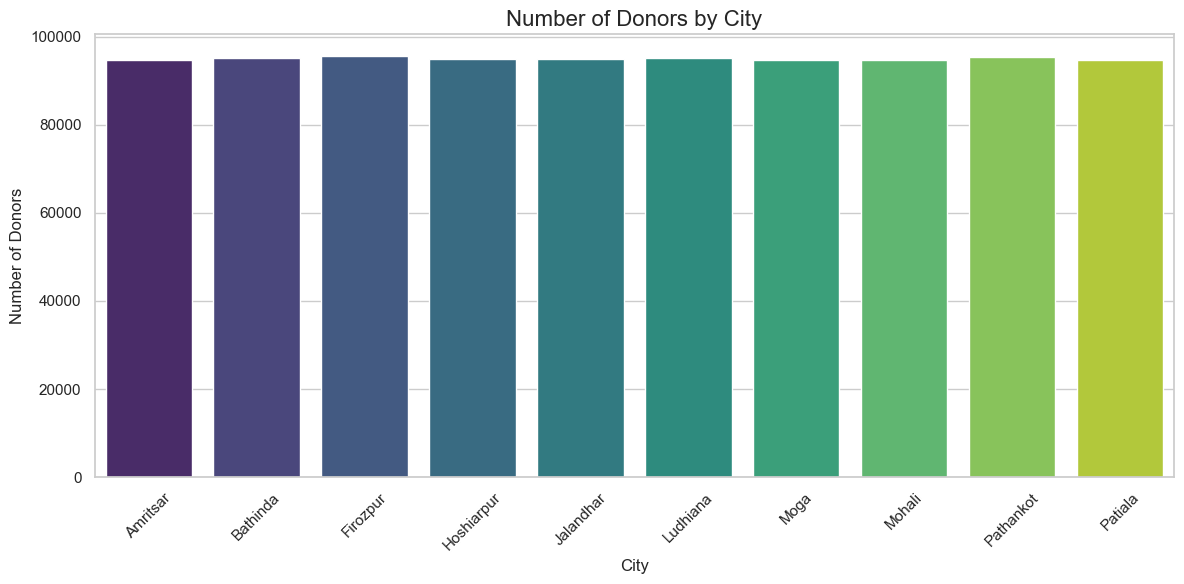

In [12]:
# Set up Seaborn styling
sns.set(style="whitegrid")

# 1. Region-Wise Analysis: Number of Donors by Region (Bar Chart)
region_analysis = donors_df.groupby('city').agg(
    num_donors=('blood_type', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='num_donors', data=region_analysis, palette="viridis")
plt.title('Number of Donors by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Donors', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

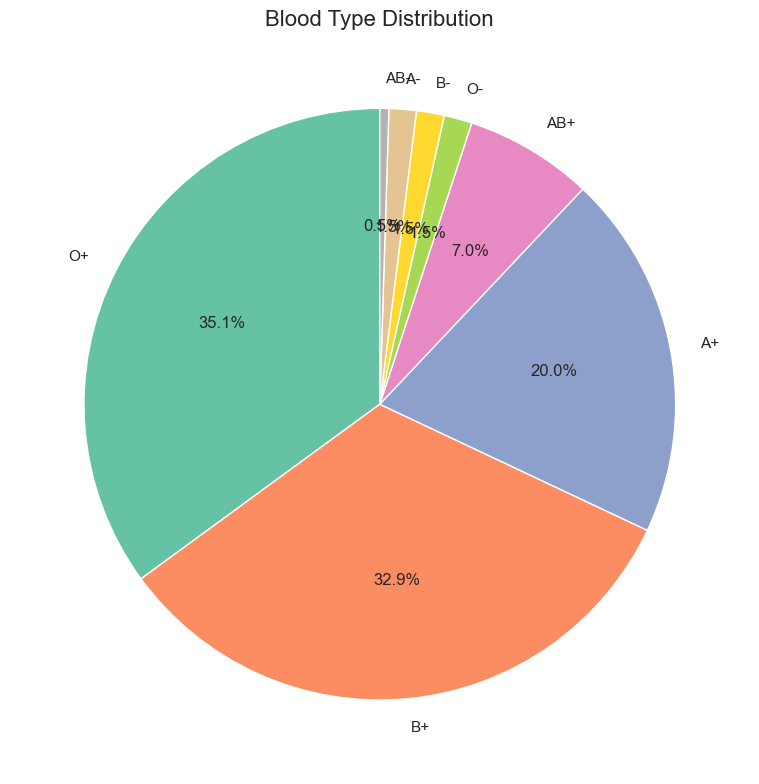

In [13]:
# 2. Blood Type Distribution (Pie Chart)
blood_type_dist = donors_df['blood_type'].value_counts()
plt.figure(figsize=(8, 8))
blood_type_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(blood_type_dist)))
plt.title('Blood Type Distribution', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

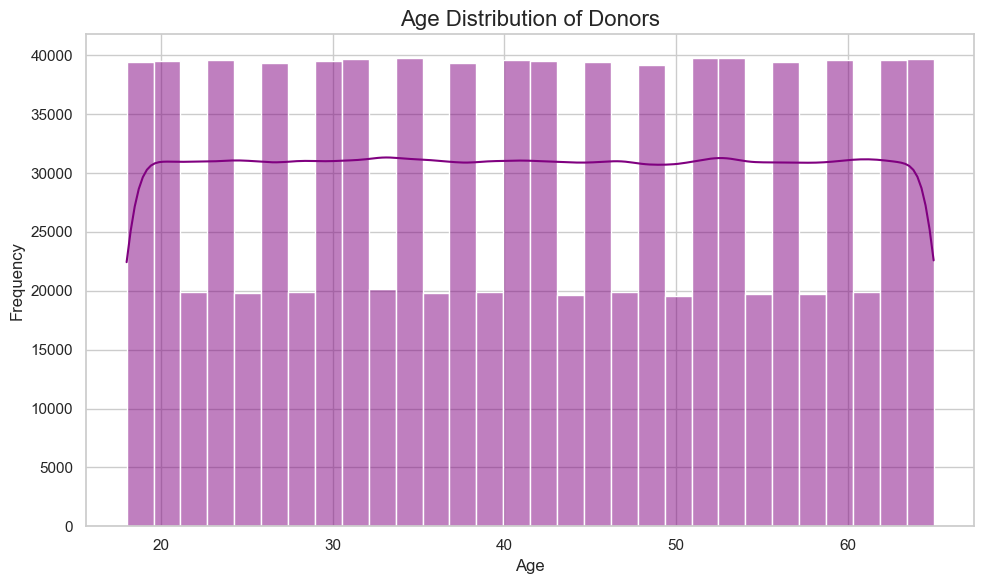

In [14]:
# 3. Age Distribution of Donors (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(donors_df['age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Donors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Ankush Kumar Ray\AppData\Local\Temp\ipykernel_36944\1945048550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='blood_type', y='age', data=donors_df, palette="Set3")


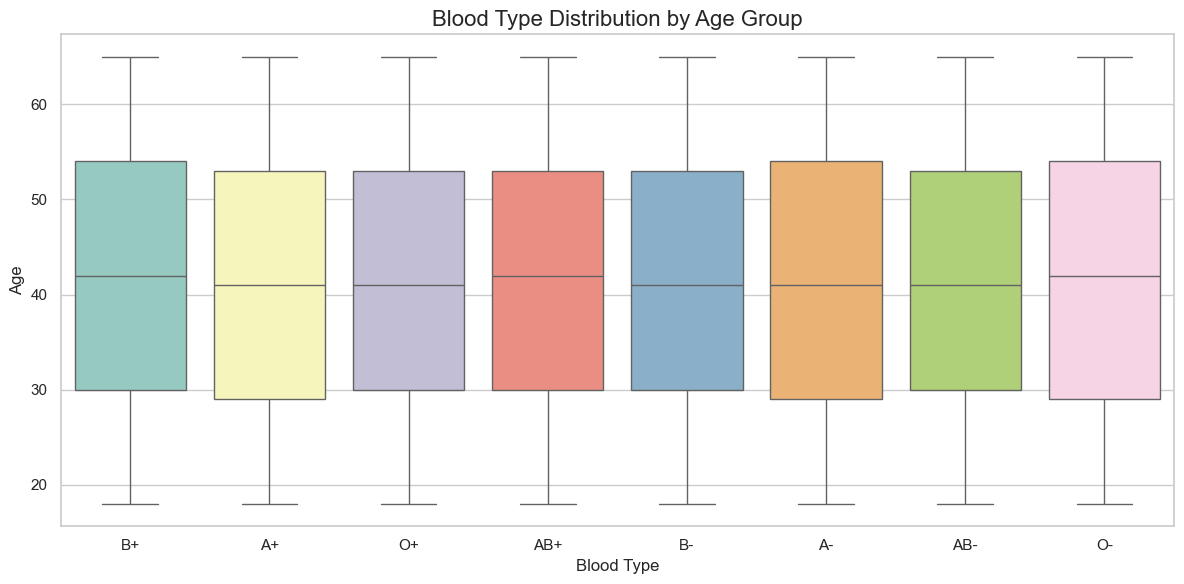

In [15]:
# 4. Blood Type Distribution by Age Group (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='blood_type', y='age', data=donors_df, palette="Set3")
plt.title('Blood Type Distribution by Age Group', fontsize=16)
plt.xlabel('Blood Type', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

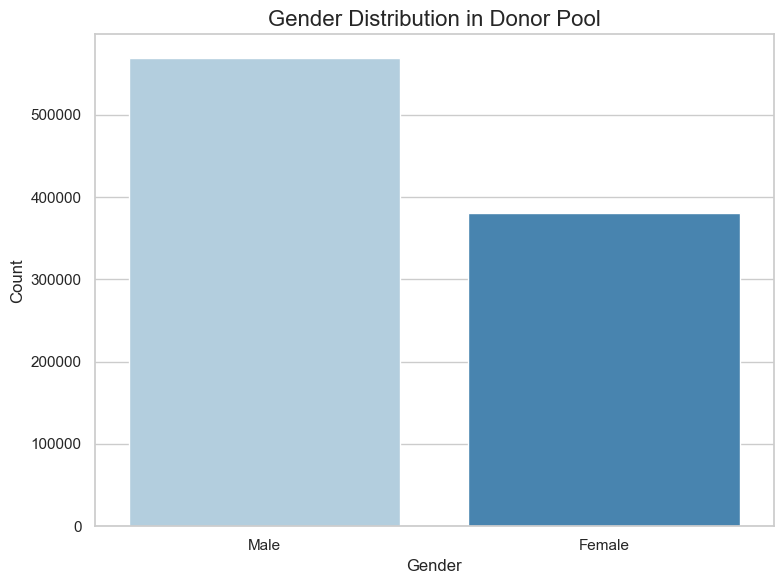

In [16]:
# 5. Gender Distribution in Donor Pool (Bar Chart)
gender_dist = donors_df['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_dist.index, y=gender_dist.values, palette="Blues", hue=gender_dist.index)
plt.title('Gender Distribution in Donor Pool', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

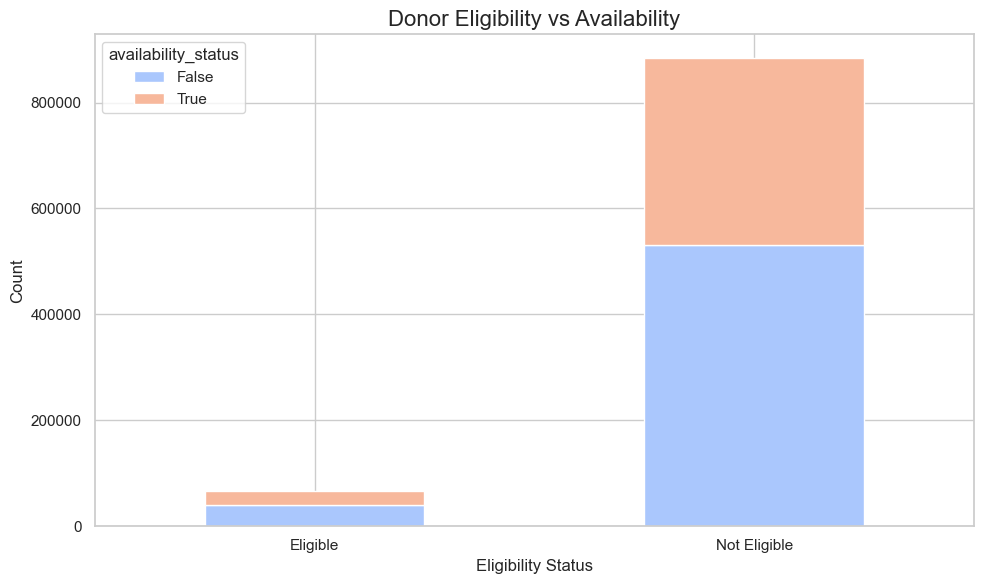

In [17]:
# 6. Donor Eligibility vs Availability (Stacked Bar Chart)
eligibility_availability = donors_df.groupby(['is_eligible', 'availability_status']).size().unstack().fillna(0)
eligibility_availability.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("coolwarm", 2))
plt.title('Donor Eligibility vs Availability', fontsize=16)
plt.xlabel('Eligibility Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Eligible', 'Not Eligible'], rotation=0)
plt.tight_layout()
plt.show()

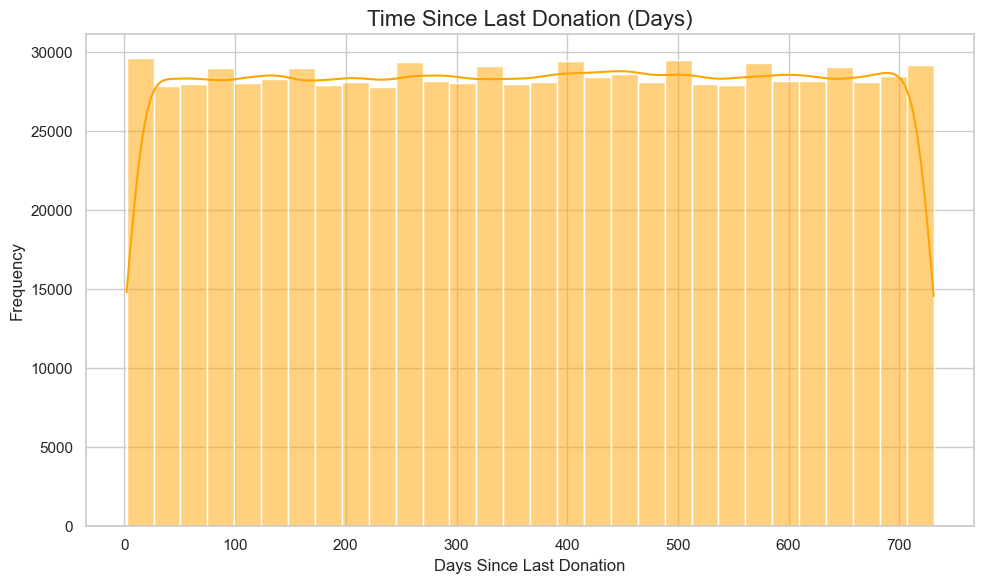

In [18]:
# Calculate the time since last donation
donors_df['days_since_last_donation'] = (pd.to_datetime('today') - donors_df['last_donation_date']).dt.days

# Segment based on donation recency
recent_donors = donors_df[donors_df['days_since_last_donation'] <= 30]  # Donors who donated in the last 30 days
inactive_donors = donors_df[donors_df['days_since_last_donation'] > 365]  # Donors who haven't donated in over a year

# Visualize
plt.figure(figsize=(10, 6))
sns.histplot(donors_df['days_since_last_donation'], bins=30, kde=True, color='orange')
plt.title('Time Since Last Donation (Days)', fontsize=16)
plt.xlabel('Days Since Last Donation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()